# ВОССТАНОВЛЕНИЕ ЗОЛОТА ИЗ РУДЫ.

# Краткое описание проекта.

Мы должны подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.
Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды.
В нашем распоряжении данные с параметрами добычи и очистки. 

# Цель проекта.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

# Описание данных.

- gold_recovery_train_new.csv — обучающая выборка;
- gold_recovery_test_new.csv — тестовая выборка;
- gold_recovery_full_new.csv — исходные данные.

Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.

# План работы.

- Подготовить данные;
- Провести исследовательский анализ данных;
- Построить и обучить модель;
- Общий вывод.


## Подготовка данных

### Изучение данных.

Загрузим все необходимые для работы библиотеки и модули.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn. metrics import mean_absolute_error as mae
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.dummy import DummyRegressor
import warnings 
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

Считаем данные из csv-файлов в датафреймы и сохраним в переменные data, data_train и data_test. В качестве индекса возьмем колонку date.

In [2]:
data = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col = 'date')
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col = 'date')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col = 'date')

Напишем функцию opening, которая будет выводить всю необходимую информацию на экран. Применим функцию к каждому датафрейму.

In [3]:
def opening(data):
    display(data.head())
    display(data.describe())
    display(data_train.isna().sum().sort_values(ascending=False))
    display(data.info())

In [4]:
opening(data_train)#получим информацию о тренировочной выборке

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,14117.000000,14149.000000,14049.000000,14149.000000,14063.000000,13863.000000,14149.000000,14148.000000,14134.000000,14103.000000,14149.000000,14145.000000,14148.000000,14145.000000,14148.000000,14147.000000,14148.000000,14146.000000,14148.000000,1.414800e+04,14148.000000,14148.000000,14149.000000,14149.000000,14049.000000,14141.000000,14005.000000,14071.000000,14149.000000,14120.000000,14141.000000,14113.000000,13721.000000,14149.000000,14149.000000,14127.000000,14149.000000,14149.000000,14148.000000,14149.000000,14149.000000,14149.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14149.000000,14149.000000,13713.000000,14149.000000,14149.000000,14149.000000,14147.000000,14139.000000,12544.000000,14149.000000,13932.000000,14148.000000,14128.000000,14148.000000,14145.000000,14148.000000,14148.000000,14148.000000,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148

secondary_cleaner.output.tail_sol                     1605
rougher.state.floatbank10_e_air                        436
rougher.input.floatbank11_xanthate                     428
primary_cleaner.output.concentrate_sol                 286
secondary_cleaner.state.floatbank2_a_air               217
final.output.concentrate_sol                           211
rougher.input.feed_size                                144
rougher.input.feed_pb                                  100
final.output.tail_pb                                   100
primary_cleaner.input.xanthate                         100
primary_cleaner.output.concentrate_pb                   86
rougher.input.feed_sol                                  78
primary_cleaner.output.tail_sol                         46
rougher.input.floatbank11_sulfate                       36
primary_cleaner.input.depressant                        32
rougher.input.floatbank10_sulfate                       29
rougher.output.concentrate_sol                          

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

None

In [5]:
opening(data_test)#получим информацию о тестовой выборке

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5287.000000,5289.000000,5269.000000,5290.000000,5285.000000,5290.000000,5282.000000,5265.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5287.000000,5290.000000,5288.000000,5290.000000,5281.000000,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,1.544844e+03,-500.199527,9.371940,3.798082,489.800620,55.951097,37.716648,9.334682,13.855759,6.467745,13.922328,6.512103,1053.400166,-395.732530,1318.926879,-475.241428,1301.595477,-474.836671,1214.847960,-475.682272,1056.648995,-469.029688,997.949719,-470.482465,26.312630,-502.750897,21.949119,-501.987097,25.402926,-507.490314,2.098211e+01,-506.627916,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,1.247731e+02,31.045257,1.926264,0.954859,108.036326,19.081758,5.491415,1.619521,3.350852,1.065114,3.223769,0.886989,121.139309,91.085505,156.450366,45.649466,171.269667,45.859866,185.763319,47.844967,131.542839,59.325990,128.218869,60.759318,3.429852,28.756505,4.354961,34.582722,6.526457,47.620908,6.736179e+00,44.528673,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,4.039220e-32,-799.794250,0.568441,0.273677,0.002986,0.046369,1.393488,0.568632,0.001147,0.000568,0.000077,0.006985,-0.042069,-657.949759,-0.721806,-650.245277,-0.056636,-647.544439,-0.992219,-648.390665,-1.982295,-649.267537,-2.593390,-649.949283,0.20

secondary_cleaner.output.tail_sol                     1605
rougher.state.floatbank10_e_air                        436
rougher.input.floatbank11_xanthate                     428
primary_cleaner.output.concentrate_sol                 286
secondary_cleaner.state.floatbank2_a_air               217
final.output.concentrate_sol                           211
rougher.input.feed_size                                144
rougher.input.feed_pb                                  100
final.output.tail_pb                                   100
primary_cleaner.input.xanthate                         100
primary_cleaner.output.concentrate_pb                   86
rougher.input.feed_sol                                  78
primary_cleaner.output.tail_sol                         46
rougher.input.floatbank11_sulfate                       36
primary_cleaner.input.depressant                        32
rougher.input.floatbank10_sulfate                       29
rougher.output.concentrate_sol                          

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

None

In [6]:
opening(data)#получим информацию об исходных данных

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,19402.000000,19439.000000,19335.000000,19439.000000,19323.000000,19069.000000,19439.000000,19435.000000,19418.000000,19377.000000,19439.000000,1.943500e+04,19438.000000,1.943500e+04,19438.000000,1.943700e+04,19438.000000,1.943600e+04,19438.000000,1.943700e+04,19437.000000,19437.000000,19439.000000,19439.000000,19339.000000,19428.000000,19294.000000,19340.000000,19439.000000,19405.000000,19431.000000,19395.000000,18986.000000,19439.000000,19439.000000,19416.000000,19439.000000,19439.000000,19438.000000,19439.000000,19439.000000,19439.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19439.000000,19439.000000,19003.000000,19439.000000,19439.000000,19439.000000,19437.000000,19427.000000,17691.000000,19439.000000,19219.000000,19438.000000,19416.000000,19438.000000,19426.000000,19438.000000,19438.000000,19438.000000,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438

secondary_cleaner.output.tail_sol                     1605
rougher.state.floatbank10_e_air                        436
rougher.input.floatbank11_xanthate                     428
primary_cleaner.output.concentrate_sol                 286
secondary_cleaner.state.floatbank2_a_air               217
final.output.concentrate_sol                           211
rougher.input.feed_size                                144
rougher.input.feed_pb                                  100
final.output.tail_pb                                   100
primary_cleaner.input.xanthate                         100
primary_cleaner.output.concentrate_pb                   86
rougher.input.feed_sol                                  78
primary_cleaner.output.tail_sol                         46
rougher.input.floatbank11_sulfate                       36
primary_cleaner.input.depressant                        32
rougher.input.floatbank10_sulfate                       29
rougher.output.concentrate_sol                          

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                             

None

**Мы видим:**
- во многих признаках встречаются пропуски значений. 
- в тестовой выборке присутствуют не все признаки, которые есть в тренировочной и исходных данных, в том числе и признаки, которые нужно спрогнозировать(rougher.output.recovery и final.output.recovery). Связываем это с тем, что эти параметры замеряются и/или рассчитываются значительно позже.


### Проверка рассчета эффективности обогащения.

**Проверим эффективность обогащения. Для проверки мы должны применить формулу для рассчета эффективности и вычислить среднюю абсолютную ошибку (MAE) между полученными значениями и значениями признака rougher.output.recovery.**

Присвоим переменные необходимые признаки, где:
- c — доля золота в концентрате после флотации/очистки(rougher.output.concentrate_au);
- f — доля золота в сырье/концентрате до флотации/очистки(rougher.input.feed_au);
- t — доля золота в отвальных хвостах после флотации/очистки(rougher.output.tail_au).

In [7]:
c = data_train['rougher.output.concentrate_au']
f = data_train['rougher.input.feed_au']
t = data_train['rougher.output.tail_au']

Вычислим эффективность обогащения,подставив в формулу все обозначенные переменные и выведем на экран первые 5 строк.

In [8]:
rec = (c*(f - t))/(f*(c-t))*100
rec.head()

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
dtype: float64

**Средняя абсолютная ошибка(MAE).**

Вычислим MAE для наших вычислений и признака rougher.output.recovery.

In [9]:
error = mae(rec, data_train['rougher.output.recovery'])
error

9.73512347450521e-15

**Значение MAE очень мало. Отсюда можно смело считать, что эффективность обогащения в исходной таблице рассчитана правильно.**

### Анализ признаков, недоступных в тестовой выборке.

Посчитаем, сколько признаков не вошло в тестовую выборку. Выведем размеры таблиц для каждого датафрейма

In [10]:
print(data_train.shape)
print(data_test.shape)
print(data.shape)

(14149, 86)
(5290, 52)
(19439, 86)


**В test не вошли 34 признака.**

Сначала посмотрим, какие столбцы есть в тестовой выборке

In [11]:
data_test.columns.to_list()

['primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air',
 'rough

Затем выведем на экран признаки, отсутствующие в тестовой выборке.

In [12]:
[column for column in data.columns if column not in data_test.columns]


['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

**Четко видно,что в тестовую выборку не попали признаки, обозначающие параметры продукта(output) и расчётные характеристики(calculation).**

Добавим целевые признаки rougher.output.recovery и final.output.recovery для дальнейшей проверки модели.

In [13]:
data_test.shape

(5290, 52)

In [14]:
data_test['rougher.output.recovery'] = data['rougher.output.recovery']
data_test['final.output.recovery'] = data['final.output.recovery']

In [15]:
data_test.shape

(5290, 54)

**В тестовой выборке теперь 54 признака, целевые добавлены.**

### Предобработка данных.

#### Пропуски.

Проверим тренировочную и тестовую выборки на наличие пропусков.

In [16]:
data_train.isna().sum().sum()

4100

In [17]:
data_test.isna().sum().sum()

90

In [18]:
data.isna().sum().sum()

4481

**заполним пропуски при помощи KNNimputer, так как соседние по времени параметры часто похожи.**

In [19]:
imputer = KNNImputer(n_neighbors=2)
data = pd.DataFrame(imputer.fit_transform(data),columns = data.columns)
data_train = pd.DataFrame(imputer.fit_transform(data_train),columns = data_train.columns)

In [20]:
imputer_1 = KNNImputer(n_neighbors=2)
data_test = pd.DataFrame(imputer_1.fit_transform(data_test),columns = data_test.columns)

Проверим выбрки на наличие пропусков после заполнения.

In [21]:
data_train.isna().sum().sum()

0

In [22]:
data_test.isna().sum().sum()

0

In [23]:
data.isna().sum().sum()

0

**Пропуски в данных заполнены.**

#### Дубликаты.

Проверим датафреймы на наличие дубликатов.

In [24]:
print(data_train.duplicated().sum())
print(data_test.duplicated().sum())
print(data.duplicated().sum())

0
0
0


**Дубликатов не нашел.**

**В тренировочной выборке много ненужных признаков, оставим только те, которые есть в тестовой выборке.**

In [25]:
data_train=data_train[data_test.columns]

- Пропуски заполнены;
- Дубликаты не обнаружены;
- Удалены ненужные признаки в тренировочной выборке;

**Данные для анализа и построения модели подготовлены.**

## Анализ данных

### Концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

**Анализ концентрации металлов будем делать на исходных данных(data), так как только в данном датафрейме присутсвуют все признаки, изначально предоставленные заказчиком.**

In [26]:
data.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,1.943900e+04,19439.000000,1.943900e+04,19439.000000,1.943900e+04,19439.000000,1.943900e+04,19439.000000,1.943900e+04,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439

**Концентрация ЗОЛОТА.**

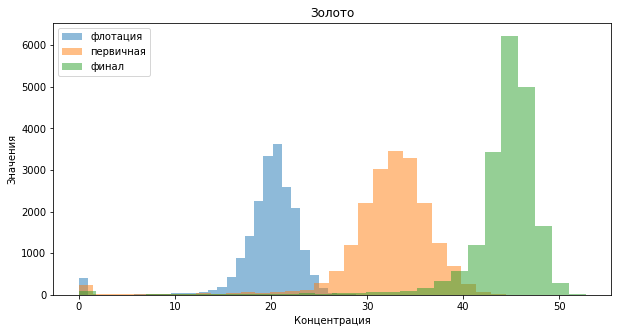

In [27]:
plt.figure(figsize=(10, 5))
plt.hist(data['rougher.output.concentrate_au'],bins=30, alpha = 0.5, label='флотация')
plt.hist(data['primary_cleaner.output.concentrate_au'],bins=30, alpha = 0.5,  label='первичная')
plt.hist(data['final.output.concentrate_au'],bins=30, alpha = 0.5, label='финал')
plt.legend(loc='upper left')
plt.xlabel('Концентрация')
plt.ylabel('Значения')
plt.title('Золото')
plt.show()

Как мы видим, наибольшая концентрация золота находится в финальных признаках, значит весь процесс очищения и обогащения работает правильно. Вообще все стадии по концентарции этого металла идут друг за другом, как и должно быть по технологическому процессу.Это наглядный пример.

**Концентрация СЕРЕБРА.**

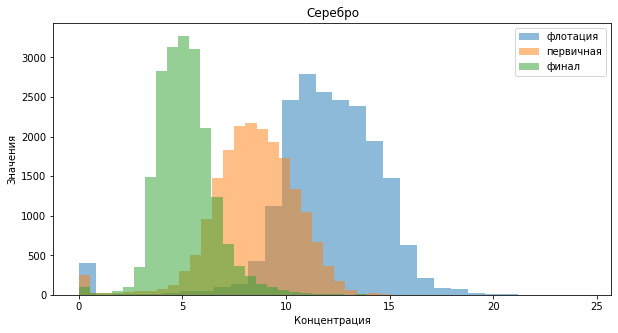

In [28]:
plt.figure(figsize=(10, 5))
plt.hist(data['rougher.output.concentrate_ag'],bins=30, alpha = 0.5, label='флотация')
plt.hist(data['primary_cleaner.output.concentrate_ag'],bins=30, alpha = 0.5,  label='первичная')
plt.hist(data['final.output.concentrate_ag'],bins=30, alpha = 0.5, label='финал')
plt.legend(loc='upper right')
plt.xlabel('Концентрация')
plt.ylabel('Значения')
plt.title('Серебро')
plt.show()

У серебра картина немного другая, относительно золота. Наибольшая концентрация наблюдается на этапе флотации. Наименьшая возникает на финальном этапе. 

**Концентрация СВИНЦА.**

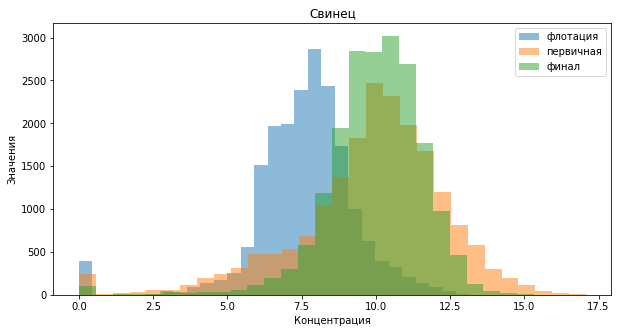

In [29]:
plt.figure(figsize=(10, 5))
plt.hist(data['rougher.output.concentrate_pb'],bins=30, alpha = 0.5, label='флотация')
plt.hist(data['primary_cleaner.output.concentrate_pb'],bins=30, alpha = 0.5,  label='первичная')
plt.hist(data['final.output.concentrate_pb'],bins=30, alpha = 0.5, label='финал')
plt.legend(loc='upper right')
plt.xlabel('Концентрация')
plt.ylabel('Значения')
plt.title('Свинец')
plt.show()

Наибольшая концентрация свинца наблюдается на этапе первичной обработки, наименьшая-на этапе флотации.

**По всем трем графиком наблюдаются выбросы в районе нуля. Удалим их (оставлю все значения больше 1), так как они могут повлиять на результаты анализа и обучения модели.**

In [30]:
data = data[data > 1]

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках.

Для того, чтобы сравнить распределения размеров гранул сырья на обучающей и тестовой выборках нужно из каждой выборки нанести на график распределение rougher.input.feed_size	 

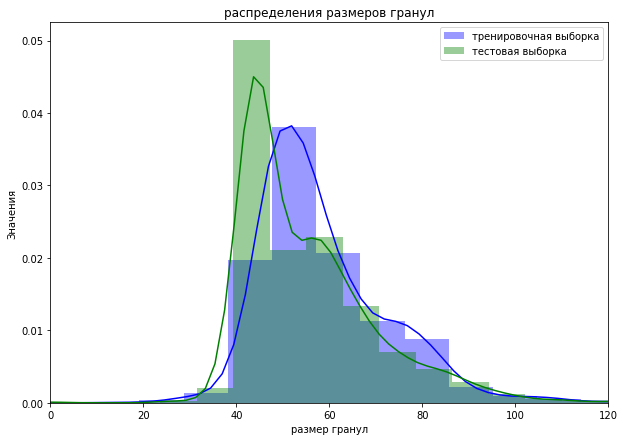

In [31]:
plt.figure(figsize=(10, 7))
sns.distplot(data_train['rougher.input.feed_size'], hist=True, kde=True, color = 'blue',label = 'тренировочная выборка')
sns.distplot(data_test['rougher.input.feed_size'], hist=True, kde=True, color = 'green',label = 'тестовая выборка')
plt.legend()
plt.xlabel('размер гранул')
plt.ylabel('Значения')
plt.title('распределения размеров гранул')
plt.xlim((0,120))
plt.show()


**Графики похожи, оценка модели будет правильной.**

### Исследование суммарной концентрации всех веществ на разных стадиях.

У нас 3 стадии: сырьё, в черновая и финальная концентрация. Посчитаем суммарную концентрацию(сумма всех металлов(Au, Ag, Pb)) для каждого этапа. Закинем полученные результаты в переменные для представления их на одном графике.

In [32]:
final_concentrate = data['final.output.concentrate_ag'] + data['final.output.concentrate_pb'] + data['final.output.concentrate_au']
rougher_concentrate = data['rougher.output.concentrate_ag'] + data['rougher.output.concentrate_pb'] + data['rougher.output.concentrate_au']
primary_cleaner_concentrate = data['primary_cleaner.output.concentrate_ag'] + data['primary_cleaner.output.concentrate_pb'] + data['primary_cleaner.output.concentrate_au']

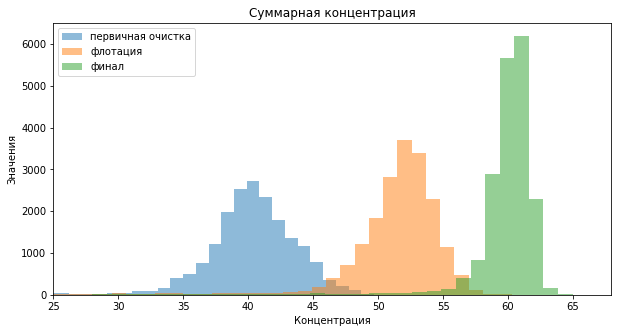

In [33]:
plt.figure(figsize=(10, 5))
plt.hist(rougher_concentrate, bins=50, alpha = 0.5,  label='первичная очистка')
plt.hist(primary_cleaner_concentrate, bins=50, alpha = 0.5, label='флотация')
plt.hist(final_concentrate, bins=50, alpha = 0.5, label='финал')
plt.legend(loc='upper left')
plt.xlabel('Концентрация')
plt.ylabel('Значения')
plt.title('Суммарная концентрация')
plt.xlim((25,None))
plt.show()

**Вывод можно сделать следующий, что суммарная концентрация всех металлов имеет наибольшее значение на финальном этапе. Это значит, что технологический процесс соблюдается правильно и на выходе мы получаем "чистый" металл.**

## Модель.

Для решения задачи применим метрику качества — sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).
Она выражается в в относительных величинах.Она хороша тем, что одинаково учитывает масштаб и целевого признака, и предсказания.

**Для начала выполним все необходимые дейсвия для подготовки данных для построения модели.**

- Оба целевых признака(rougher.output.recovery и final.output.recovery) определим в одну переменную для удобства.

In [34]:
TARGETS = ['rougher.output.recovery','final.output.recovery']

- Затем разделим тренировочную и тестовую выборки на признаки(все столбцы, кроме TARGETS) и целевые признаки(только TARGETS).

In [35]:
features_train = data_train.drop(TARGETS, axis='columns')
target_train = data_train[TARGETS]
features_test = data_test.drop(TARGETS, axis='columns')
target_test = data_test[TARGETS]

- стандартизируем(приведем к одному масштабу) данные в тренировочной выборке.

In [36]:
scaler = StandardScaler()#Создадим объект структуры
scaler.fit(data_train)#настроим его на обучающих данных 
data_train = pd.DataFrame(scaler.transform(data_train), columns = data_train.columns)#Преобразуем обучающую выборку функцией transform()
print(data_train.shape) 
print(data_train.head())

(14149, 54)
   primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0                      -0.152523                          0.377564   
1                      -0.189372                          0.427387   
2                      -0.234954                          0.729976   
3                      -0.273991                          0.731714   
4                      -0.381861                          0.907173   

   primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
0                        -0.117761                        0.284092   
1                        -0.117761                        0.321185   
2                        -0.117761                        0.290779   
3                        -0.117761                        0.305380   
4                        -0.117761                        0.340409   

   primary_cleaner.state.floatbank8_a_air  \
0                               -0.453649   
1                               -0.248081   
2          

**Данные для обучения моделей подготовлены.**

### Напишем функцию для вычисления итоговой sMAPE.

In [37]:
def final_smape(y_true, y_pred):
    higher = np.abs(y_true - y_pred)
    below = (np.abs(y_true) + np.abs(y_pred))/2
    smape = ((higher / below)*100).sum()/len(y_pred)
    return 0.25 * smape[0] + 0.75 * smape[1]

Сделаем маркер из метрики производительности или функции потерь(make_scorer). На вход ей передадим нашу функцию.

In [38]:
smape_scorer = make_scorer(final_smape, greater_is_better=False)

**Применим к нашим данным несколько моделей машинного обучения и выберем ту, которая покажет наиболее низкий результат smape. Чем smape ниже, тем точнее модель. Рассмотрим три популярные модели:**

- решающее дерево.
- случайный лес.
- линейная регрессия.

Для поиска гиперпараметров воспользуемся GridSearchCV(). Это инструмент для автоматического подбирания параметров для моделей машинного обучения. GridSearchCV находит наилучшие параметры, путем обычного перебора: он создает модель для каждой возможной комбинации параметров.На вход передадим модель, её гиперпараметры, кросс-валидацию(cv) равную 5 и применим наш маркер smape_scorer.

#### Дерево решений.

In [39]:
%%time

param_grid = {'max_depth': range(1, 9)}

model = DecisionTreeRegressor(random_state=12345)
search = RandomizedSearchCV(model, param_grid, cv=5, scoring=smape_scorer)
search.fit(features_train, target_train)
print('Лучшее sMAPE для дерева решений:', -search.best_score_, 'с гиперпараметрами:', search.best_params_)

Лучшее sMAPE для дерева решений: 10.935014680066505 с гиперпараметрами: {'max_depth': 4}
CPU times: user 13.2 s, sys: 34.4 ms, total: 13.2 s
Wall time: 13.2 s


Результат smape дерева-10.9 с глубиной 4.

#### Случайный лес.

In [40]:
%%time

param_grid = { 'n_estimators': range(10, 51, 10),
               'max_depth': range (1,7, 2)}

model = RandomForestRegressor(random_state=12345)
search = RandomizedSearchCV(model, param_grid, cv=5, scoring=smape_scorer)
search.fit(features_train, target_train)
print('Лучшее sMAPE для случайного леса:',-search.best_score_, 'с гиперпараметрами:', search.best_params_)

Лучшее sMAPE для случайного леса: 10.366083527666495 с гиперпараметрами: {'n_estimators': 40, 'max_depth': 5}
CPU times: user 3min 42s, sys: 512 ms, total: 3min 43s
Wall time: 3min 43s


Результат-10.3 с глубиной 5 и количеством деревьев 40.

#### Линейная регрессия.

RandomizedSearchCV() для линейной регрессии не подходит. Обучим модель без него.

In [41]:
%%time

model = LinearRegression()
model.fit(features_train, target_train)
smape = cross_val_score(model, features_train, target_train, cv=5, scoring=smape_scorer).mean()
print('Лучшее sMAPE для линейной регрессии:', -smape)

Лучшее sMAPE для линейной регрессии: 12.535898006411529
CPU times: user 2.73 s, sys: 4.24 s, total: 6.97 s
Wall time: 6.95 s


Результат-12.5

**Наилучший результат показала модель случайного леса(10.36). Проверим её качество на тестовых данных с оптимальными гиперпараметрами(max_depth=5, n_estimators=40,random_state=12345).**

In [42]:
model = RandomForestRegressor(max_depth=5, n_estimators=40, random_state=12345) 
model.fit(features_train, target_train)
predictions = model.predict(features_test)
smape_test = final_smape(target_test, predictions)
print('sMAPE тестовой выборки:', smape_test)

sMAPE тестовой выборки: 9.142629290494721


**Результат тестовой выборки даже лучше, чем на обучающей.**

Сравним smape лучшей модели с результатом константной модели. Возьмем DummyRegressor. 

In [43]:
dummy = DummyRegressor(strategy="median")
dummy.fit(features_train,target_train)
dummy_predict = dummy.predict(features_test)
dummy_smape_test = final_smape(target_test, dummy_predict)
print('sMAPE константной модели:', dummy_smape_test)

sMAPE константной модели: 9.479919198122861


**Дамми, который генерирует случайные прогнозы,имеет худшее качество чем случайный лес(9.4 против 10.3). Делаем вывод, что наша модель адекватна.**

## Общий вывод

Нам была поставлена задача подготовить прототип модели машинного обучения для «Цифры».Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В нашем распоряжении были данные с параметрами добычи и очистки. 

На этапе подготовки данных мы подробно изучили данные во всех трех выборках и сделали выводы, что в некоторых признаках **встречаются пропуски значений**.Так же **в тестовой выборке присутствуют не все признаки**, которые есть в тренировочной и исходных данных, в том числе и признаки, которые нужно спрогнозировать (rougher.output.recovery и final.output.recovery).
Проверили **правильность рассчета эффективности обогащения**, применив формулу для вычисления эффективности Recall. Выяснили, что данные рассчитаны правильно.
Так же проанализировали, какие именно признаки не попали в тестовую выборку.

На этапе анализа данных мы сравнивали концентрацию металлов (Au, Ag, Pb) на различных этапах очистки. Анализ показал, что наибольшая концентрация **золота** ожидаемо находится на финальном этапе, а наименьшая на этапе флотации. Наибольшая концентрация **серебра** наблюдается на этапе флотации. Наименьшая возникает на финальном этапе. Наибольшая концентрация **свинца** наблюдается на этапе первичной обработки, наименьшая-на этапе флотации. Еще на данном этапе мы **провели сравнение распределения размеров гранул сырья на обучающей и тестовой выборках** при помощи графиков. Графики **похожи** друг на друга, поэтому оценка модели будет правильной. Заключительным исследованием на данном этапе стало **исследование суммарной концентрации всех веществ на разных стадиях.** Сделали вывод  что **суммарная концентрация всех металлов имеет наибольшее значение на финальном этапе**. 

На заключительном этапе мы строили модели, изначально подготовив данные для обучения. Метрикой качетства была выбрана **smape**. Написали функцию для определения итогового smape и применили её для вычисления на разных моделях машинного обучения. **Наилучший результат показала модель случайного леса** с результатом 10.36. Определили для неё оптимальные гиперпараметры при помощи интсрумента GridSearchCV(). Проверили модель на тестовых данных. Результат-9.14. Имеено модель случайного леса рекомендую к использованию. Так же сравнили лучшую модель с константной. В качестве константной выбрали DummyRegressor. DummyRegressor имеет худший результа, по сравнению с лучшей моделью, что говорит о том, что наша модель адекватна.